## spin labeling

In [1]:
import glob
import os
import numpy as np
import cv2
path = '/home/minkyung/spin-storage/labeling/shot02/spin/*'
imname = '/home/minkyung/spin-storage/labeling/shot02/spin/dt:'

file_list = glob.glob(path)
pnglist = [file for file in file_list if os.path.basename(file).startswith('dt')]

nimg = len(pnglist)
imlist = []
for i in np.arange(nimg):
    fullpath = imname+str(i)+'.png'
    imlist.append({'fname': os.path.basename(fullpath), 'img': cv2.cvtColor(cv2.imread(fullpath), cv2.COLOR_BGR2RGB)})
    
    


In [2]:
# 이미지 조합 생성(이중 loop)
intv_max = 4
indice = np.tile(np.arange(nimg), (intv_max,nimg))

In [3]:
indice1 = []
indice2 = []
for intv in np.arange(1,intv_max+1):
    arr1 = np.array([idx for idx in np.arange(nimg) if idx+intv<nimg])
    arr2 = np.array([idx+intv for idx in np.arange(nimg) if idx+intv<nimg])
    indice1.append(arr1)
    indice2.append(arr2)
    

In [164]:
# 비교대상 불러오기
import yaml
with open('/home/minkyung/spin-storage/shot/axis10r/ground_truth.yaml') as f:
    remain_yaml = yaml.load(f, Loader=yaml.FullLoader)
    

FileNotFoundError: [Errno 2] No such file or directory: '/home/minkyung/spin-storage/shot/axis10r/ground_truth.yaml'

i1 0 i2 1 intv 0


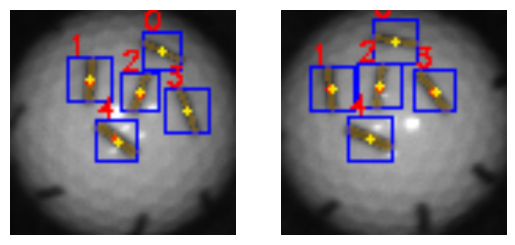

input array of mark2
--- Result
ball1: 0
ball2: 1
mark1: [0, 1, 2, 3, 4]
mark2: [0, 1, 2, 3, 4] 


i1 1 i2 2 intv 0


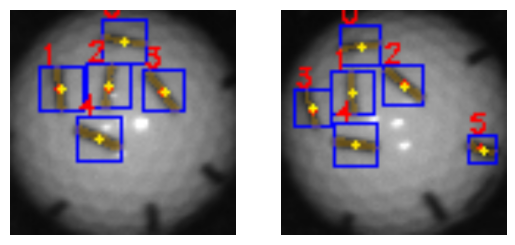

input array of mark2
--- Result
ball1: 1
ball2: 2
mark1: [0, 1, 2, 3, 4]
mark2: [0, 3, 1, 2, 4] 


i1 2 i2 3 intv 0


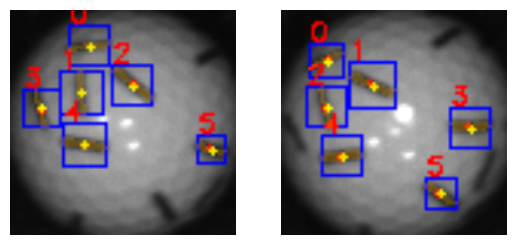

input array of mark2
--- Result
ball1: 2
ball2: 3
mark1: [0, 1, 2, 3, 4, 5]
mark2: [0, 2, 1, -1, 4, 3] 


i1 3 i2 4 intv 0


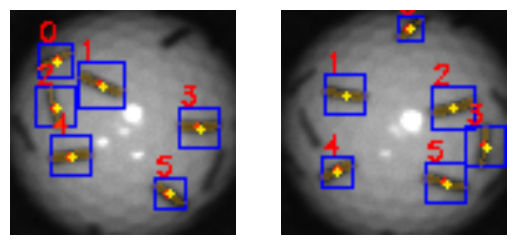

input array of mark2
--- Result
ball1: 3
ball2: 4
mark1: [0, 1, 2, 3, 4, 5]
mark2: [-1, 1, -1, 2, 4, 5] 


i1 4 i2 5 intv 0


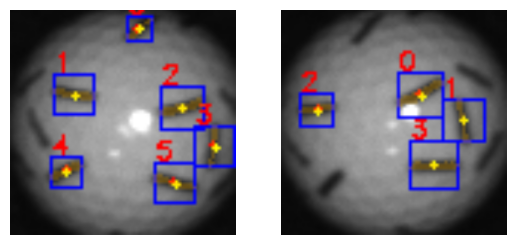

input array of mark2
--- Result
ball1: 4
ball2: 5
mark1: [0, 1, 2, 3, 4, 5]
mark2: [-1, 2, 0, 1, -1, 3] 


i1 5 i2 6 intv 0


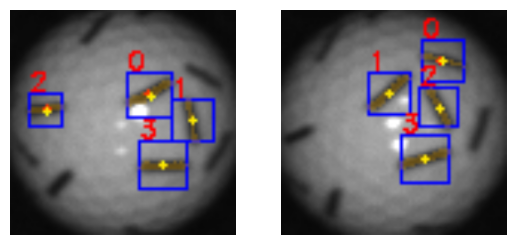

input array of mark2
--- Result
ball1: 5
ball2: 6
mark1: [0, 1, 2, 3]
mark2: [1, 2, -1, 3] 


i1 0 i2 2 intv 1


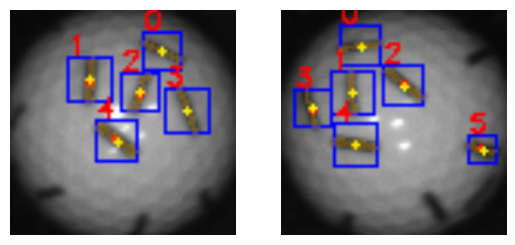

input array of mark2
--- Result
ball1: 0
ball2: 2
mark1: [0, 1, 2, 3, 4]
mark2: [0, 3, 1, 2, 4] 


i1 1 i2 3 intv 1


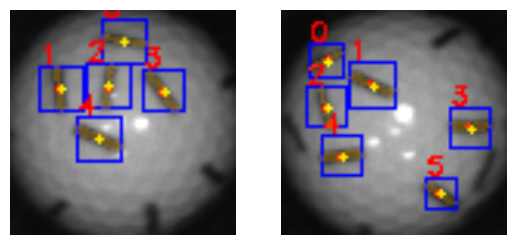

input array of mark2
--- Result
ball1: 1
ball2: 3
mark1: [0, 1, 2, 3, 4]
mark2: [0, -1, 2, 1, 4] 


i1 2 i2 4 intv 1


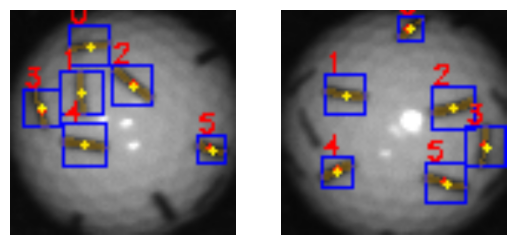

input array of mark2
--- Result
ball1: 2
ball2: 4
mark1: [0, 1, 2, 3, 4, 5]
mark2: [-1, -1, 1, -1, 4, 2] 


i1 3 i2 5 intv 1


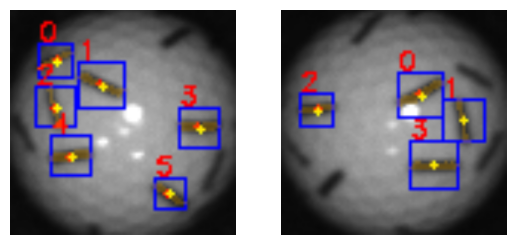

input array of mark2
--- Result
ball1: 3
ball2: 5
mark1: [0, 1, 2, 3, 4, 5]
mark2: [-1, 2, -1, 0, -1, 3] 


i1 4 i2 6 intv 1


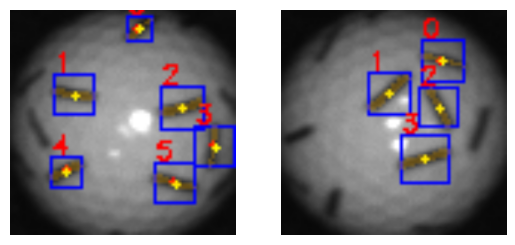

input array of mark2
--- Result
ball1: 4
ball2: 6
mark1: [0, 1, 2, 3, 4, 5]
mark2: [-1, -1, 1, 2, -1, 3] 


i1 0 i2 3 intv 2


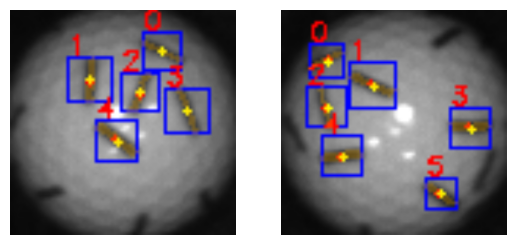

input array of mark2
--- Result
ball1: 0
ball2: 3
mark1: [0, 1, 2, 3, 4]
mark2: [0, -1, 2, 1, 4] 


i1 1 i2 4 intv 2


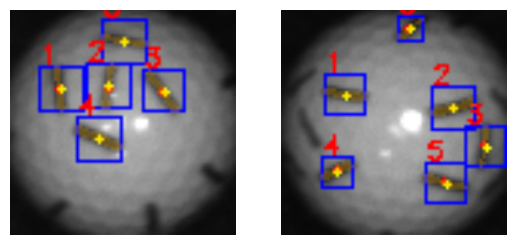

input array of mark2
--- Result
ball1: 1
ball2: 4
mark1: [0, 1, 2, 3, 4]
mark2: [-1, -1, -1, 1, 4] 


i1 2 i2 5 intv 2


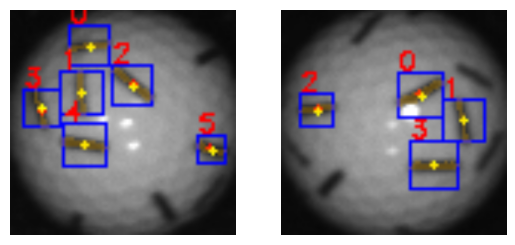

input array of mark2
--- Result
ball1: 2
ball2: 5
mark1: [0, 1, 2, 3, 4, 5]
mark2: [-1, -1, 2, -1, -1, 0] 


i1 3 i2 6 intv 2


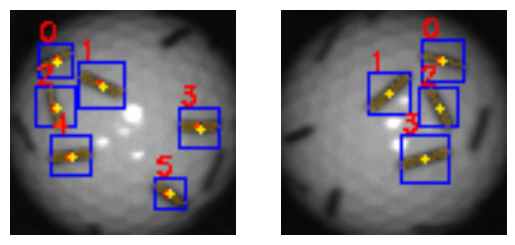

input array of mark2
--- Result
ball1: 3
ball2: 6
mark1: [0, 1, 2, 3, 4, 5]
mark2: [-1, -1, -1, 1, -1, 3] 


i1 0 i2 4 intv 3


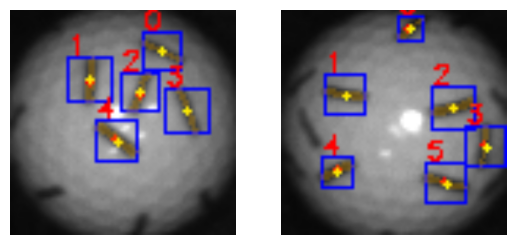

input array of mark2
--- Result
ball1: 0
ball2: 4
mark1: [0, 1, 2, 3, 4]
mark2: [-1, -1, -1, 1, 4] 


i1 1 i2 5 intv 3


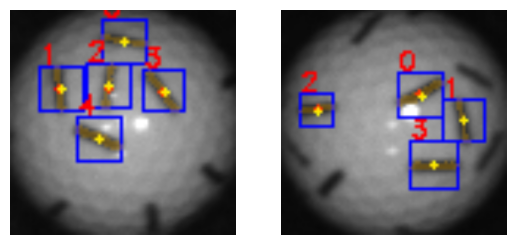

input array of mark2
--- Result
ball1: 1
ball2: 5
mark1: [0, 1, 2, 3, 4]
mark2: [-1, -1, -1, 2, -1] 


i1 2 i2 6 intv 3


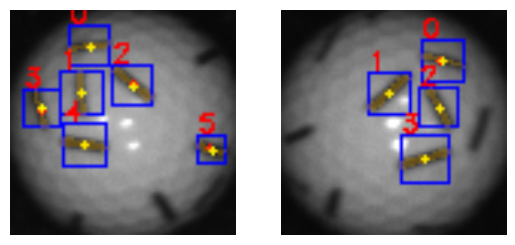

input array of mark2
--- Result
ball1: 2
ball2: 6
mark1: [0, 1, 2, 3, 4, 5]
mark2: [-1, -1, -1, -1, -1, 1] 




In [6]:
import matplotlib.pyplot as plt
import yaml

yaml_list = []

cnt = 0
for intv in np.arange(intv_max):
    
    for i, (i1_, i2_) in enumerate(zip(indice1[intv], indice2[intv])):
        
        ball1 = int(i1_)
        ball2 = int(i2_)

        print('i1', ball1, 'i2', ball2, 'intv', intv)
        fname1 = imlist[ball1]['fname']
        img1 = imlist[ball1]['img']

        fname2 = imlist[ball2]['fname']
        img2 = imlist[ball2]['img']

        plt.subplot(121), plt.axis('off'), plt.imshow(img1)
        plt.subplot(122), plt.axis('off'), plt.imshow(img2)
        plt.show()

        print('input array of mark2')
        mark2_str = input()
        
        mark2_list = list(map(int, mark2_str.split(' ')))

        nmark1 = len(mark2_list)
        mark1_list = np.arange(nmark1).tolist()

        print('--- Result')
        print('ball1:', ball1)
        print('ball2:', ball2)
        print('mark1:', mark1_list)
        print('mark2:', mark2_list, '\n\n')

        dic_tmp = {'ball1': ball1, 'marker1':mark1_list, 'ball2':ball2, 'marker2':mark2_list}
        yaml_list.append(dic_tmp) 
        
        

with open('ground_truth.yaml', 'w') as f:
    yaml.dump(yaml_list, f)